### Data Exploration

**About Dataset**

The The data is related to the direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed by the customer or not.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy import stats

In [35]:
df = pd.read_csv(r'C:\Users\Z40\Documents\Rakamin Academy - Data Science\Train - Banking Marketing Targets.csv')
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


In [32]:
df.shape

(45211, 17)

### Exploratory Daya Analysis (EDA)

**1. Descriptive Analysis**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
#Negative Balanced

df[(df['balance'] < 0) & (df['poutcome'] != 'unknown')].head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24416,43,technician,divorced,secondary,no,-36,yes,no,cellular,17,nov,190,1,104,1,failure,no
24528,43,blue-collar,divorced,secondary,no,-259,no,no,cellular,17,nov,732,1,171,2,other,no
24536,42,technician,single,secondary,no,-15,no,no,cellular,17,nov,89,1,145,1,failure,no
24589,37,services,married,secondary,yes,-954,yes,no,cellular,17,nov,69,1,180,3,failure,no


In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [10]:
num_dtypes = ['int16', 'int32', 'int64', 'float', 'float16', 'float16', 'float32', 'float64']
num_df = df.select_dtypes(include = num_dtypes)
numerical = num_df.columns

cat_dtypes = ['object']
cat_df = df.select_dtypes(include = cat_dtypes)
categorical = cat_df.columns

print(numerical)
print(categorical)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


In [11]:
for col in categorical:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom job:
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Value count kolom marital:
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Value count kolom education:
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Value count kolom default:
no     44396
yes      815
Name: default, dtype: int64

Value count kolom housing:
yes    25130
no     20081
Name: housing, dtype: int64

Value count kolom loan:
no     37967
yes     7244
Name: loan, dtype: int64

Value count kolom contact:
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

Value count kolom month:
may    13766
jul     6895
aug     6247
jun     5341
nov     3970

In [12]:
df['y'].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: y, dtype: float64

**2. Univariate Analysis**

**a. Displot (Numerical)**

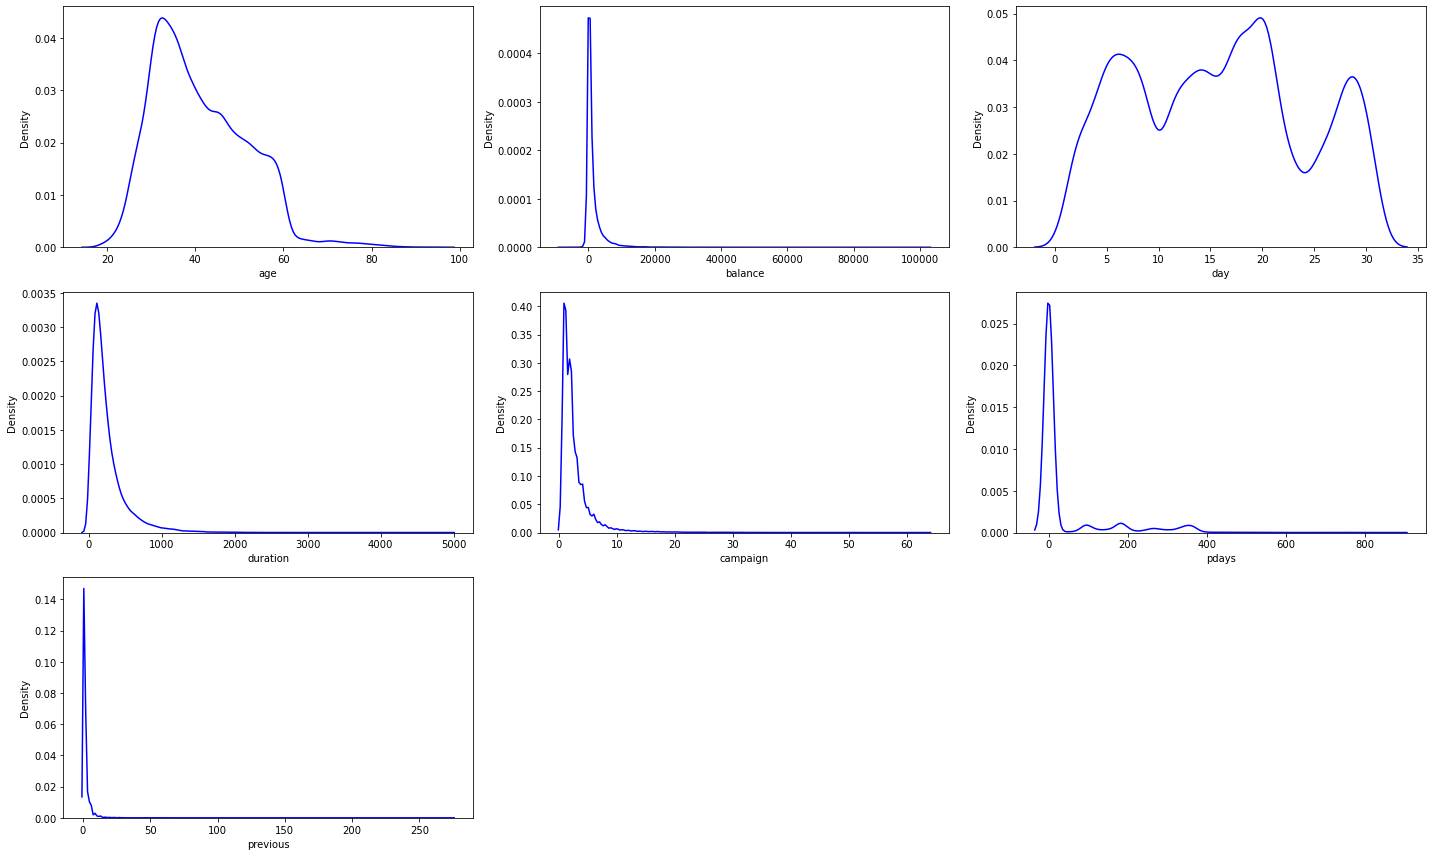

In [22]:
features_num = numerical
plt.figure(figsize=(20,12))
for i in range(0, len(numerical)):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(x=df[features_num[i]], color = 'blue')
    plt.tight_layout()

**b. Histogram (Numerical)**

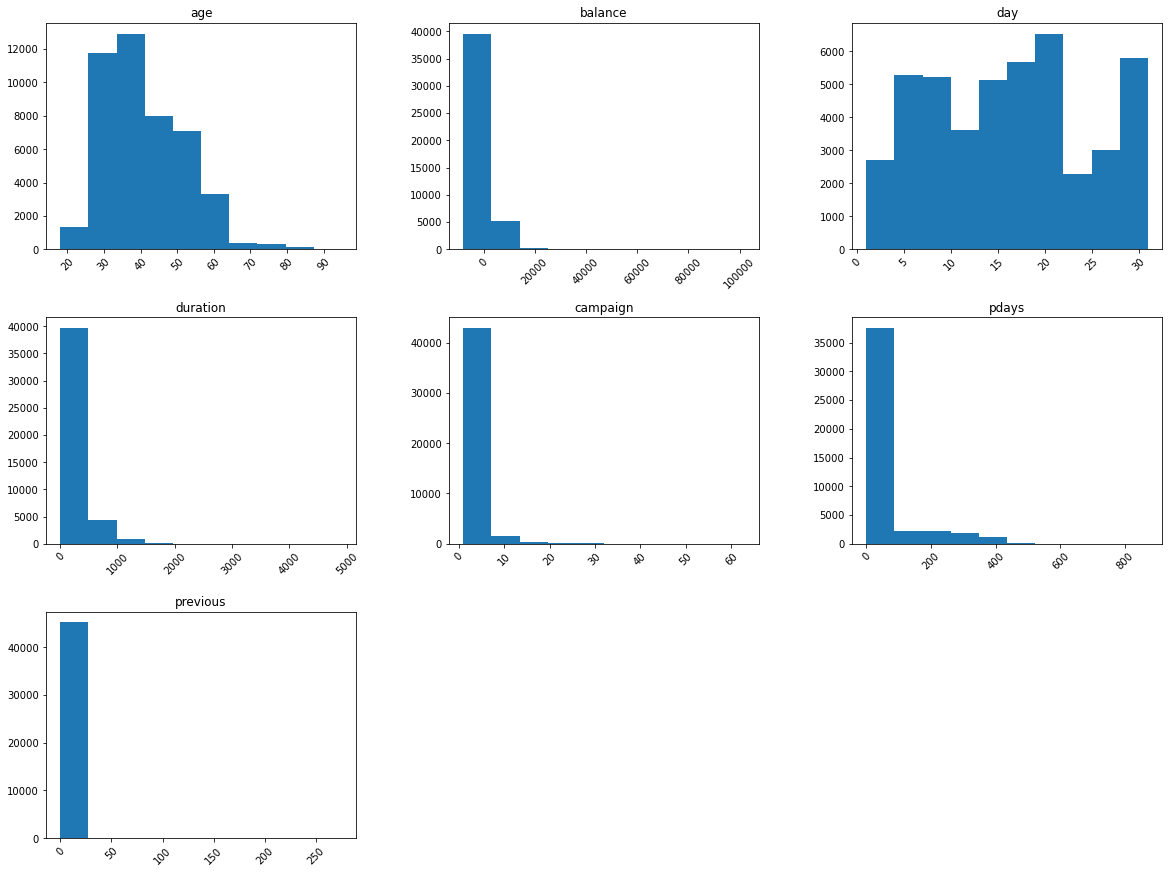

In [20]:
df.hist(figsize=(20,15), xrot=45, grid=False)
plt.show()

**c. Boxplot (Numerical)**

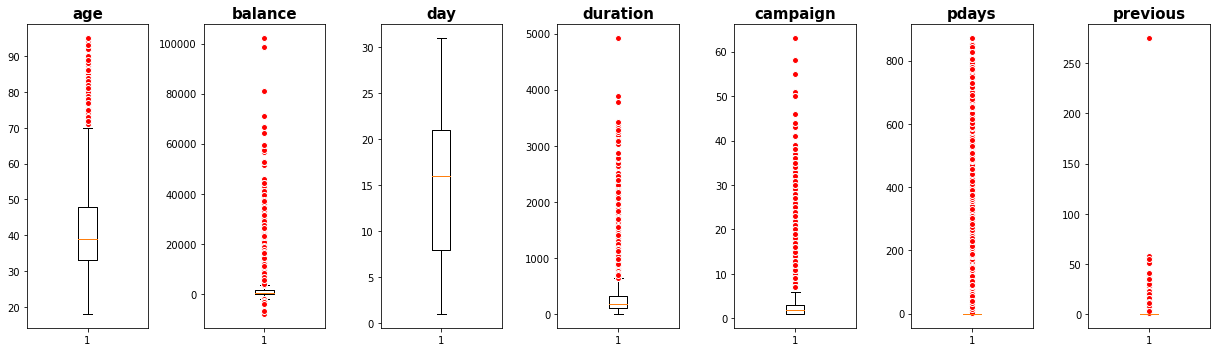

In [66]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(1, len(numericals), figsize=(17,5))

for i, ax in enumerate(axs.flat):
  ax.boxplot(df[numericals].iloc[:,i], flierprops=red_circle)
  ax.set_title(df[numericals].columns[i], fontsize=15, fontweight='bold')
  ax.tick_params(axis='y', labelsize=10)    
plt.tight_layout()

**d. Barplot (Categorical)**

<Figure size 720x360 with 0 Axes>

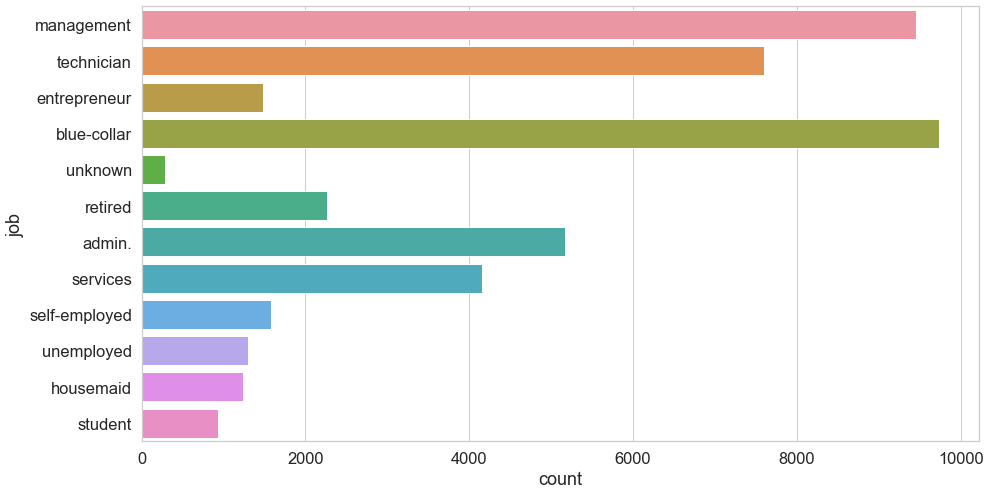

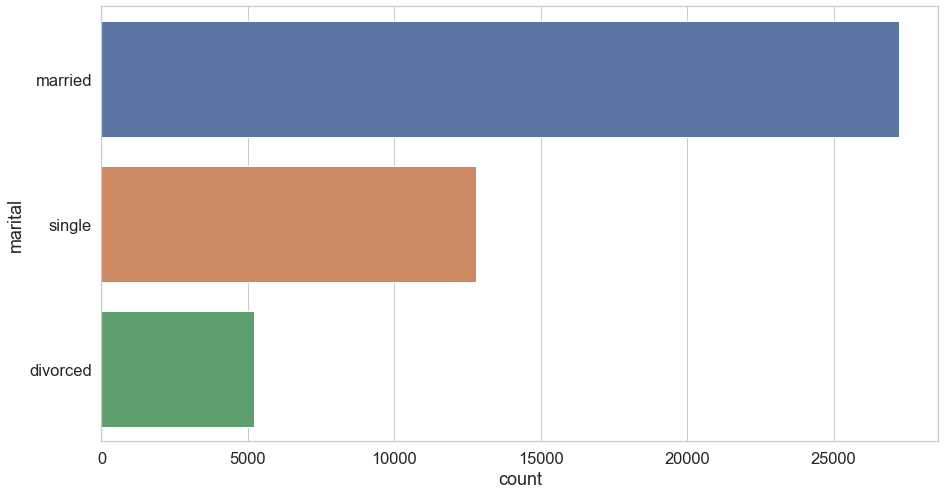

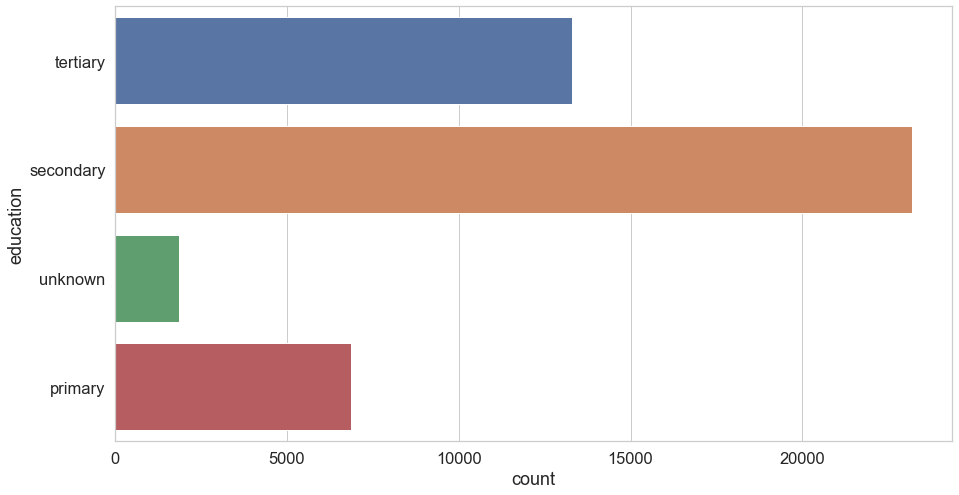

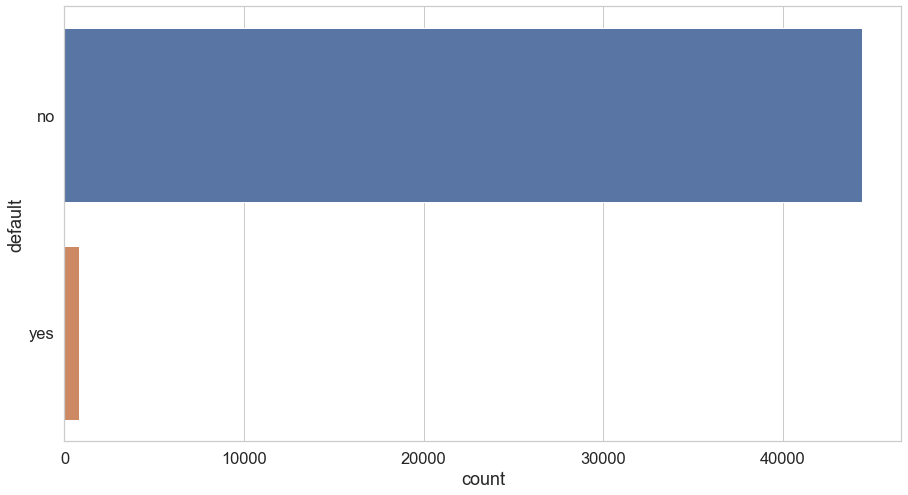

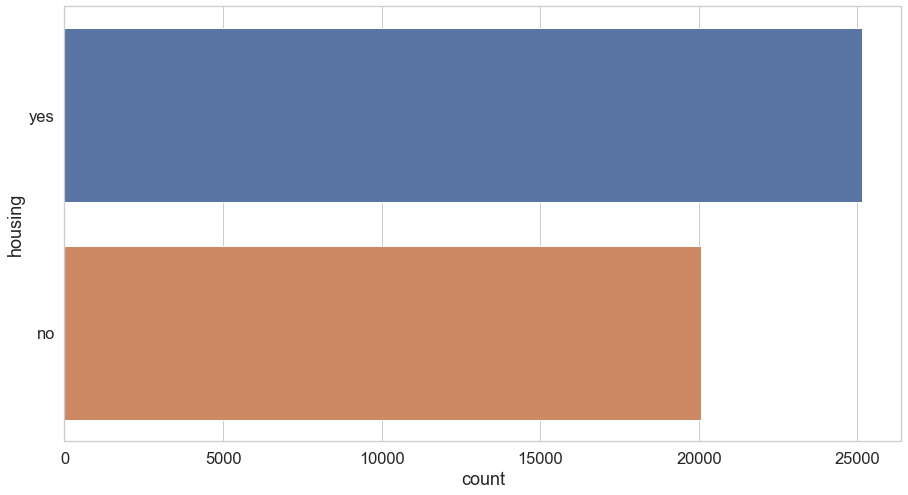

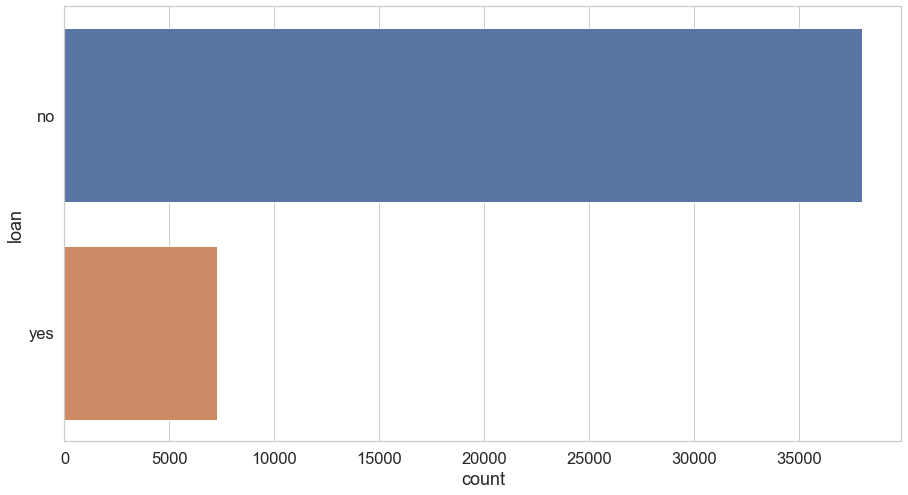

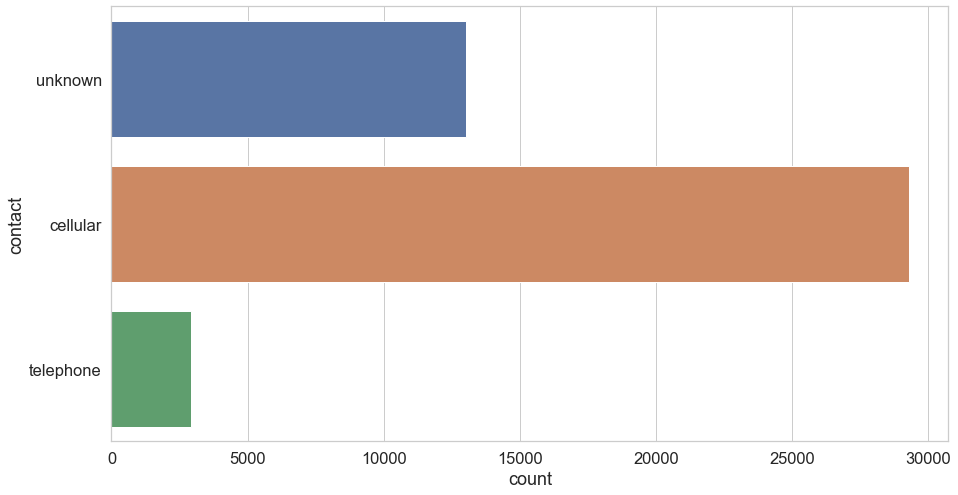

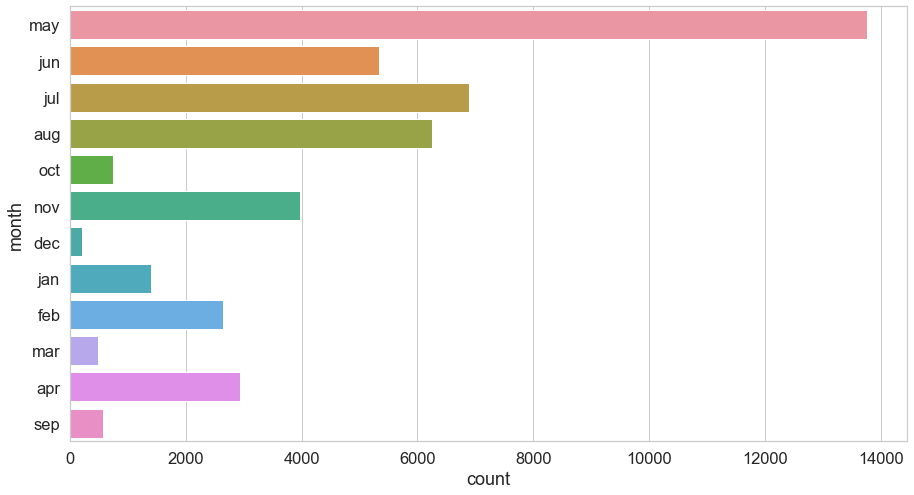

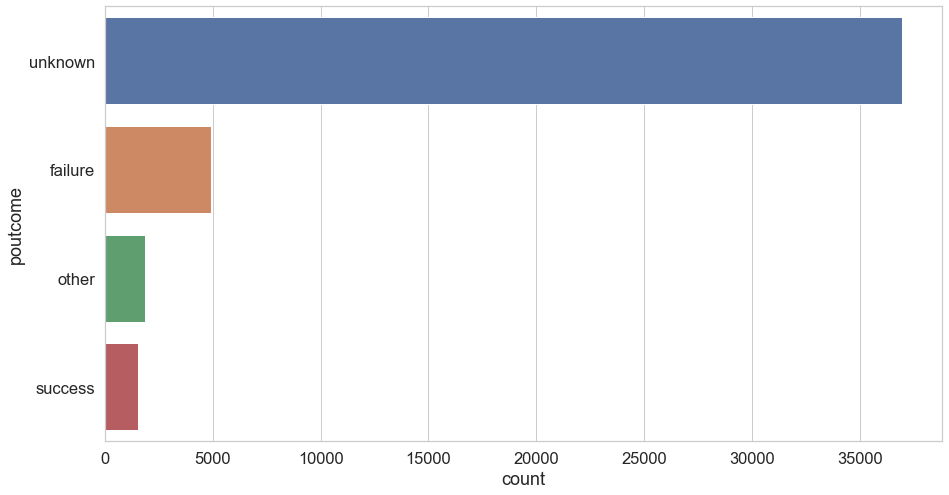

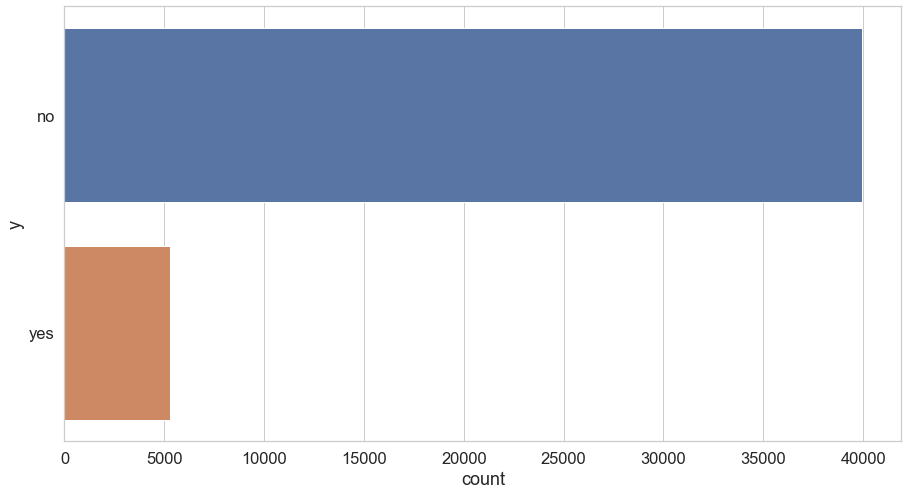

In [45]:
plt.figure(figsize=(10, 5))
for column in df.select_dtypes(include='object'):
    if df[column].nunique() < 16:
        fig, ax =plt.subplots(1, 1)
        sns.countplot(y=column, data=df)
        plt.show()

**3. Multivariate Analysis**

In [25]:
df['y'] = df['y'].astype('category').cat.codes
df.sample(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
25544,36,self-employed,married,secondary,no,189,yes,no,cellular,19,nov,136,1,120,1,failure,0
17979,54,management,single,secondary,no,602,no,no,cellular,30,jul,101,2,-1,0,unknown,0
11541,51,blue-collar,married,primary,no,91,no,yes,unknown,19,jun,368,2,-1,0,unknown,0


In [26]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
y,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


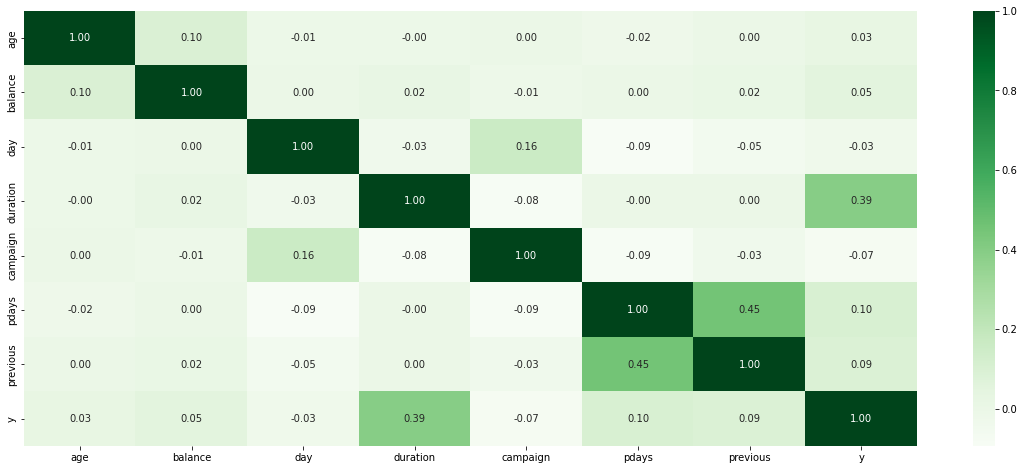

In [81]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), cmap='Greens', annot=True, fmt='.2f')
plt.show()

### Visualization and Insight

**Job**

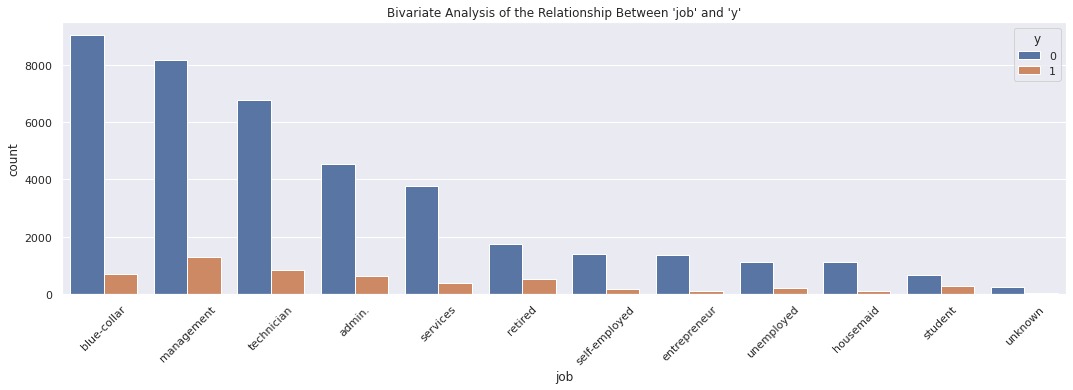

In [91]:
sns.set(rc = {'figure.figsize':(18, 5)})
job = sns.countplot(x="job", data = df, hue = "y", order = df["job"].value_counts().index)
job.tick_params(axis='x', rotation=45)
plt.title("Bivariate Analysis of the Relationship Between 'job' and 'y'")
plt.show()

**Marital Status**

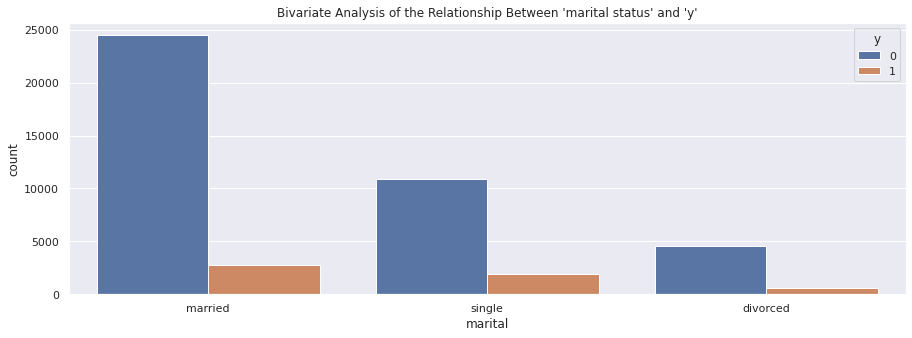

In [101]:
sns.set(rc = {'figure.figsize':(15, 5)})
job = sns.countplot(x="marital", data = df, hue = "y", order = df["marital"].value_counts().index)
job.tick_params(axis='x')
plt.title("Bivariate Analysis of the Relationship Between 'marital status' and 'y'")
plt.show()

**Education**

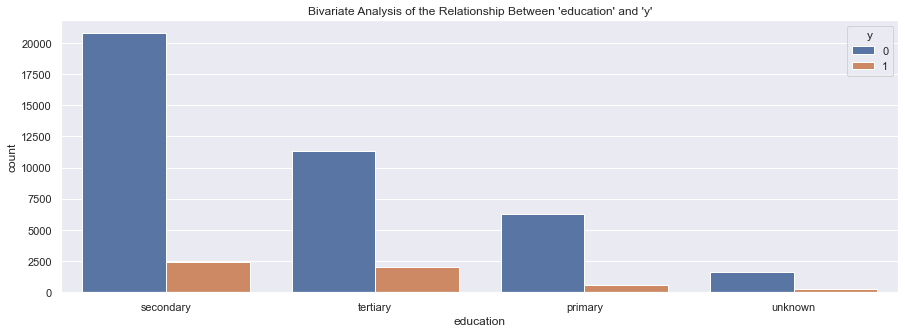

In [29]:
sns.set(rc = {'figure.figsize':(15, 5)})
job = sns.countplot(x="education", data = df, hue = "y", order = df["education"].value_counts().index)
job.tick_params(axis='x')
plt.title("Bivariate Analysis of the Relationship Between 'education' and 'y'")
plt.show()

**Default**

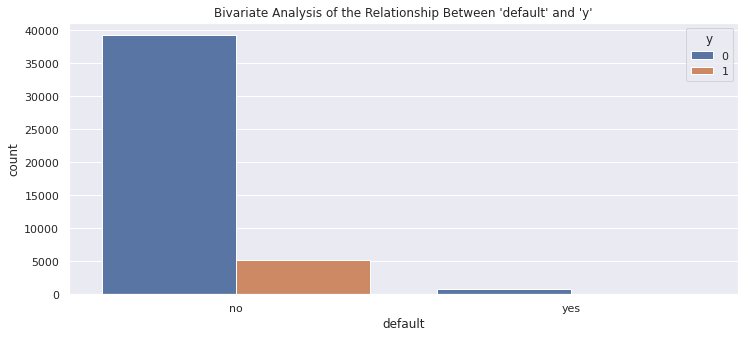

In [103]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(12, 5)})
job = sns.countplot(x="default", data = df, hue = "y", order = df["default"].value_counts().index)
job.tick_params(axis='x')
plt.title("Bivariate Analysis of the Relationship Between 'default' and 'y'")
plt.show()

**Housing**

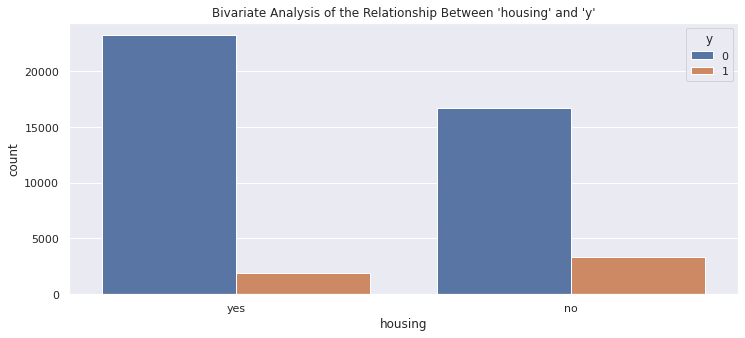

In [105]:
sns.set(rc = {'figure.figsize':(12, 5)})
job = sns.countplot(x="housing", data = df, hue = "y", order = df["housing"].value_counts().index)
job.tick_params(axis='x')
plt.title("Bivariate Analysis of the Relationship Between 'housing' and 'y'")
plt.show()

**Loan**

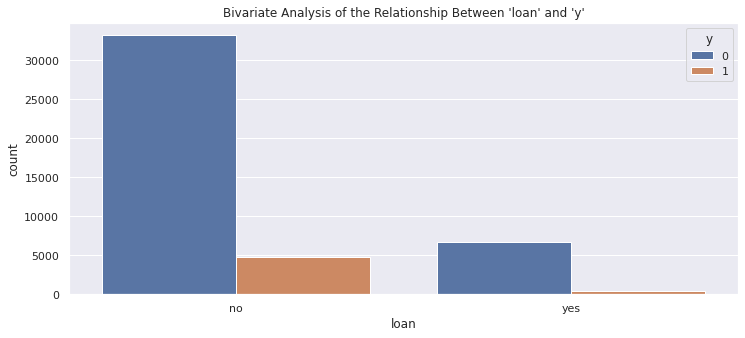

In [106]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(12, 5)})
job = sns.countplot(x="loan", data = df, hue = "y", order = df["loan"].value_counts().index)
job.tick_params(axis='x')
plt.title("Bivariate Analysis of the Relationship Between 'loan' and 'y'")
plt.show()

**Contact**

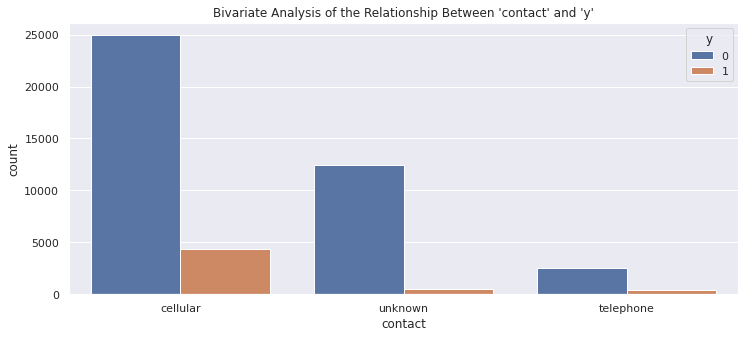

In [108]:
sns.set(rc = {'figure.figsize':(12, 5)})
job = sns.countplot(x="contact", data = df, hue = "y", order = df["contact"].value_counts().index)
job.tick_params(axis='x')
plt.title("Bivariate Analysis of the Relationship Between 'contact' and 'y'")
plt.show()

**Month**

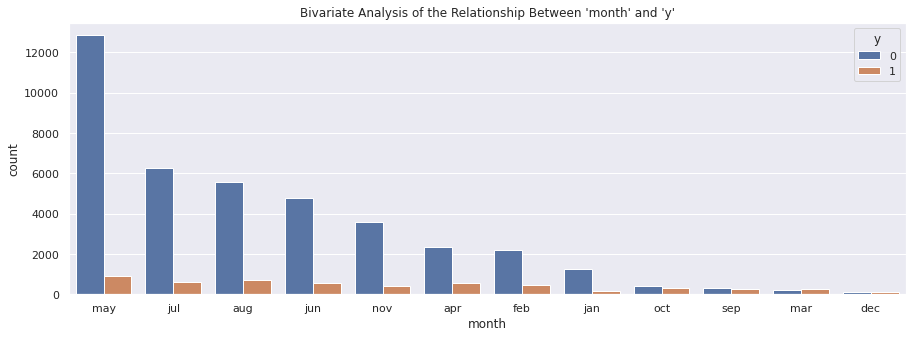

In [112]:
sns.set(rc = {'figure.figsize':(15, 5)})
job = sns.countplot(x="month", data = df, hue = "y", order = df["month"].value_counts().index)
job.tick_params(axis='x')
plt.title("Bivariate Analysis of the Relationship Between 'month' and 'y'")
plt.show()

**Previous Campaign Outcome**

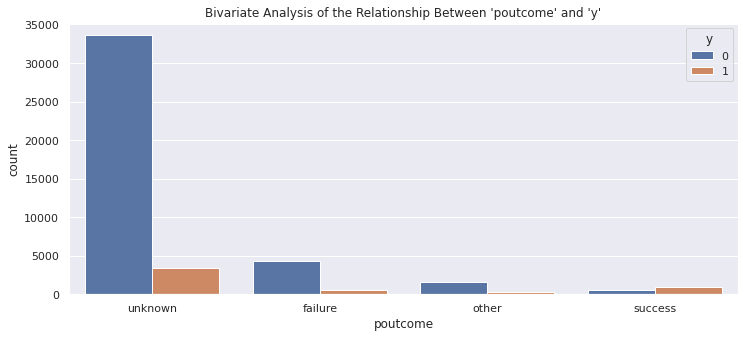

In [114]:
sns.set(rc = {'figure.figsize':(12, 5)})
job = sns.countplot(x="poutcome", data = df, hue = "y", order = df["poutcome"].value_counts().index)
job.tick_params(axis='x')
plt.title("Bivariate Analysis of the Relationship Between 'poutcome' and 'y'")
plt.show()

**Y as Target Output**

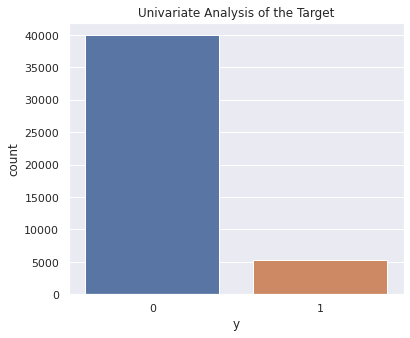

In [116]:
sns.set(rc = {'figure.figsize':(6, 5)})
target = sns.countplot(x="y", data = df, order = df["y"].value_counts().index)
target.tick_params(axis='x')
plt.title("Univariate Analysis of the Target")
plt.show()

**Age**

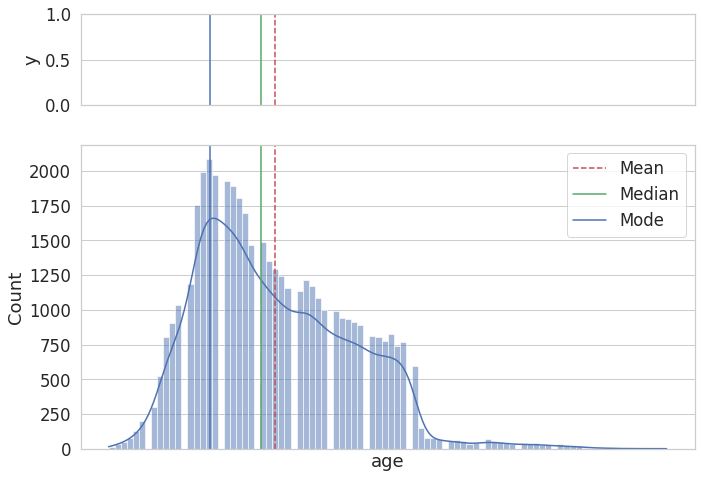

In [135]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(8,8)}, font_scale=1.5, style='whitegrid')
mean = df['age'].mean()
median = df['age'].median()
mode = df['age'].mode().values[0]

age = sns.boxplot(data=df, x="age", y="y", ax=ax_box, order = df["y"].value_counts().index)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x="age", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

**Balance**

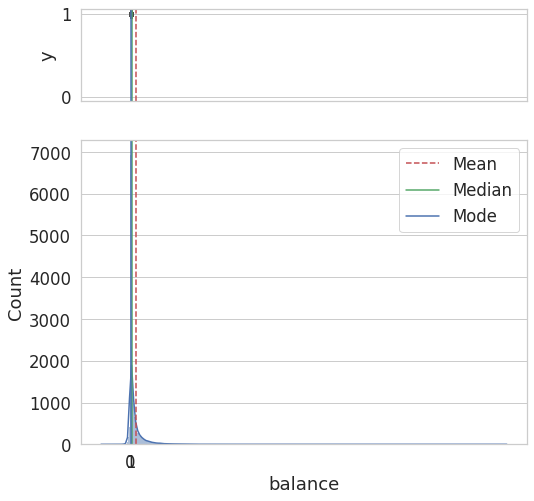

In [136]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(8,8)}, font_scale=1.5, style='whitegrid')
mean = df['balance'].mean()
median = df['balance'].median()
mode = df['balance'].mode().values[0]

age = sns.boxplot(data=df, x="balance", y="y", ax=ax_box, order = df["y"].value_counts().index)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x="balance", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

**Day**

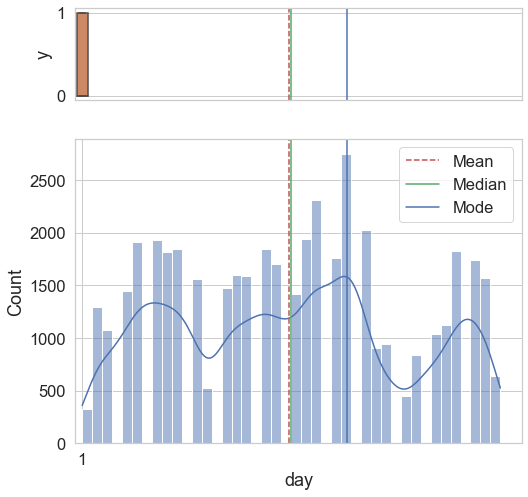

In [31]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(15,8)}, font_scale=1.5, style='whitegrid')
mean = df['day'].mean()
median = df['day'].median()
mode = df['day'].mode().values[0]

age = sns.boxplot(data=df, x="day", y="y", ax=ax_box, order = df["y"].value_counts().index)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x="day", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

**Duration**

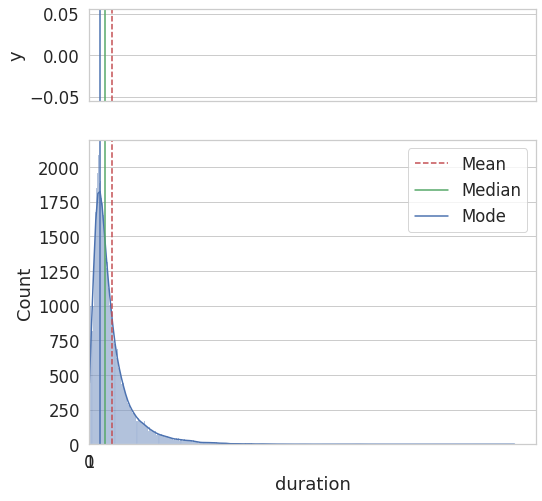

In [138]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(8,8)}, font_scale=1.5, style='whitegrid')
mean = df['duration'].mean()
median = df['duration'].median()
mode = df['duration'].mode().values[0]

age = sns.boxplot(data=df, x="duration", y="y", ax=ax_box, order = df["y"].value_counts().index)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x="duration", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

**Campaign**

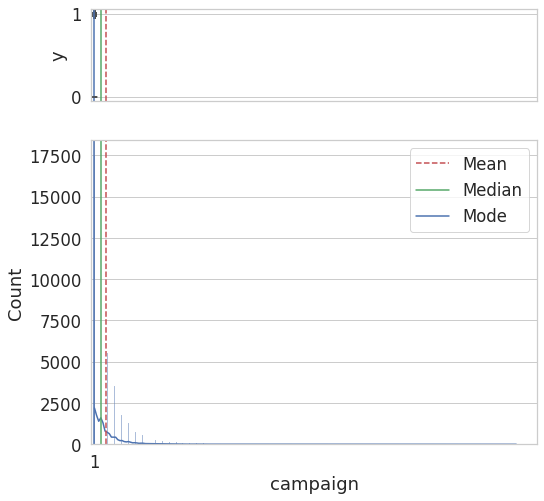

In [139]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(8,8)}, font_scale=1.5, style='whitegrid')
mean = df['campaign'].mean()
median = df['campaign'].median()
mode = df['campaign'].mode().values[0]

age = sns.boxplot(data=df, x="campaign", y="y", ax=ax_box, order = df["y"].value_counts().index)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x="campaign", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

**Pdays**

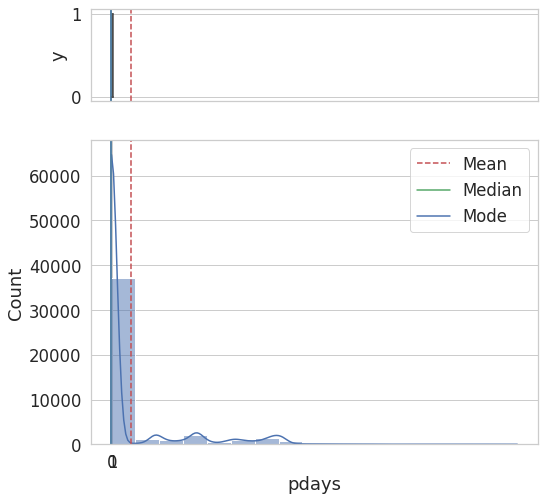

In [140]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(8,8)}, font_scale=1.5, style='whitegrid')
mean = df['pdays'].mean()
median = df['pdays'].median()
mode = df['pdays'].mode().values[0]

age = sns.boxplot(data=df, x="pdays", y="y", ax=ax_box, order = df["y"].value_counts().index)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x="pdays", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

**Previous**

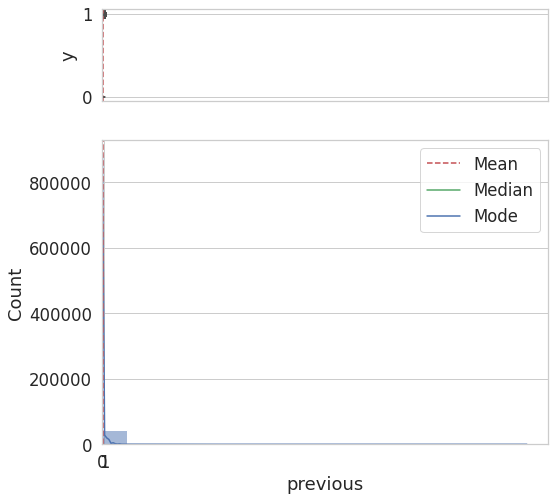

In [141]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(8,8)}, font_scale=1.5, style='whitegrid')
mean = df['previous'].mean()
median = df['previous'].median()
mode = df['previous'].mode().values[0]

age = sns.boxplot(data=df, x="previous", y="y", ax=ax_box, order = df["y"].value_counts().index)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x="previous", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()